In [ ]:
import pandas as pd

aircraft_arrivals = pd.read_csv('aircraft-arrivals-departures.csv')
exports = pd.read_csv('domestic-exports-by-area-annual.csv')
%matplotlib inline

In [4]:
aircraft_arrivals = aircraft_arrivals.set_index(pd.DatetimeIndex(aircraft_arrivals['month']))

In [7]:
exports = exports.set_index(pd.DatetimeIndex(exports['year'].apply(lambda x: pd.to_datetime(x, format='%Y'))))

In [9]:
exports['domestic_exports'] = exports['domestic_exports'].apply(pd.to_numeric, errors='coerce')

In [43]:
import numpy as np

In [46]:
type(aircraft_arrivals.index) == pd.tseries.index.DatetimeIndex

True

In [12]:
aircraft_arrivals = aircraft_arrivals.assign(aircraft_movements = lambda x: x['aircraft_arrivals'] + x['aircraft_departures'])

In [53]:
any(aircraft_arrivals['aircraft_arrivals'] + aircraft_arrivals['aircraft_departures'] != aircraft_arrivals['aircraft_movements'])

False

In [61]:
annual_movements = aircraft_arrivals.resample('A').sum()

del annual_movements['aircraft_departures']
del annual_movements['aircraft_arrivals']

annual_movements['aircraft_movements'][0] == 75971

True

In [65]:
annual_exports = exports.resample('A').sum()

# The old 'year' column has been summed as well in this operation, let's drop it
del annual_exports['year']

annual_exports["domestic_exports"][0] == 25806

True

In [19]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [66]:
singapore_data = pd.merge(annual_movements, annual_exports, left_index=True, right_index=True)

singapore_data.head()

,aircraft_movements,domestic_exports
1980-12-31,75971,25806.0
1981-12-31,71365,29452.0
1982-12-31,68159,29158.0
1983-12-31,67594,29207.0
1984-12-31,70674,33052.0


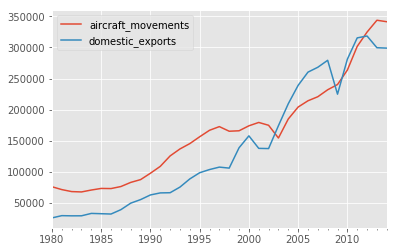

In [38]:
singapore_data.plot()

In [40]:
annual_movements.corr(annual_exports['domestic_exports'])

0.95069611122618358